# Problem Statement

Create a Machine learning sysytem using linear regression which takes crimes data from the dataset and predict the output

# 1 Import Libraries

In [15]:
# prompt: import all the common ML libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# prompt: mount this to my google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Colab Notebooks/'


assignment.ipynb  Intelligent.ipynb		   Untitled0.ipynb  Untitled2.ipynb
crime.csv	  SVM_Cancer_Classification.ipynb  Untitled1.ipynb


In [4]:
df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/crime.csv', sep=',')

#3 DEA

In [5]:
df.head(10)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
5,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682
6,12.7,1,11.1,8.2,7.9,0.519,98.2,4,13.9,0.097,3.8,6200,16.8,0.042100,20.6993,963
7,13.1,1,10.9,11.5,10.9,0.542,96.9,50,17.9,0.079,3.5,4720,20.6,0.040099,24.5988,1555
8,15.7,1,9.0,6.5,6.2,0.553,95.5,39,28.6,0.081,2.8,4210,23.9,0.071697,29.4001,856
9,14.0,0,11.8,7.1,6.8,0.632,102.9,7,1.5,0.100,2.4,5260,17.4,0.044498,19.5994,705


In [6]:
df.tail(10)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
37,13.3,0,10.4,5.1,4.7,0.599,102.4,7,4.0,0.099,2.7,4250,22.5,0.053998,16.6999,566
38,14.9,1,8.8,6.1,5.4,0.515,95.3,36,16.5,0.086,3.5,3950,25.1,0.047099,27.3004,826
39,14.5,1,10.4,8.2,7.4,0.560,98.1,96,12.6,0.088,3.1,4880,22.8,0.038801,29.3004,1151
40,14.8,0,12.2,7.2,6.6,0.601,99.8,9,1.9,0.084,2.0,5900,14.4,0.025100,30.0001,880
41,14.1,0,10.9,5.6,5.4,0.523,96.8,4,0.2,0.107,3.7,4890,17.0,0.088904,12.1996,542
42,16.2,1,9.9,7.5,7.0,0.522,99.6,40,20.8,0.073,2.7,4960,22.4,0.054902,31.9989,823
43,13.6,0,12.1,9.5,9.6,0.574,101.2,29,3.6,0.111,3.7,6220,16.2,0.028100,30.0001,1030
44,13.9,1,8.8,4.6,4.1,0.480,96.8,19,4.9,0.135,5.3,4570,24.9,0.056202,32.5996,455
45,12.6,0,10.4,10.6,9.7,0.599,98.9,40,2.4,0.078,2.5,5930,17.1,0.046598,16.6999,508
46,13.0,0,12.1,9.0,9.1,0.623,104.9,3,2.2,0.113,4.0,5880,16.0,0.052802,16.0997,849


In [7]:
# prompt: show the random 10 rows in the df

df.sample(10)


,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
13,13.5,0,11.7,6.2,6.1,0.595,98.6,22,4.6,0.077,2.7,5290,19.0,0.053200,21.5010,664
25,13.1,0,12.1,16.0,14.3,0.631,107.1,3,7.7,0.102,4.1,6740,15.2,0.041698,22.1005,1993
19,12.5,0,10.8,11.3,10.5,0.567,98.5,78,9.4,0.130,5.8,6260,16.6,0.034801,26.4010,1225
29,16.6,1,8.9,5.8,5.4,0.521,97.3,46,25.4,0.072,2.6,3960,23.7,0.075298,28.3011,696
40,14.8,0,12.2,7.2,6.6,0.601,99.8,9,1.9,0.084,2.0,5900,14.4,0.025100,30.0001,880
6,12.7,1,11.1,8.2,7.9,0.519,98.2,4,13.9,0.097,3.8,6200,16.8,0.042100,20.6993,963
36,17.7,1,8.7,5.8,5.6,0.638,97.4,24,34.9,0.076,2.8,3820,25.4,0.045198,31.6995,831
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
12,12.8,0,11.3,6.7,6.0,0.624,97.2,28,1.0,0.077,2.5,5070,20.6,0.045302,36.2993,511
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


In [8]:
df.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 6.0 KB


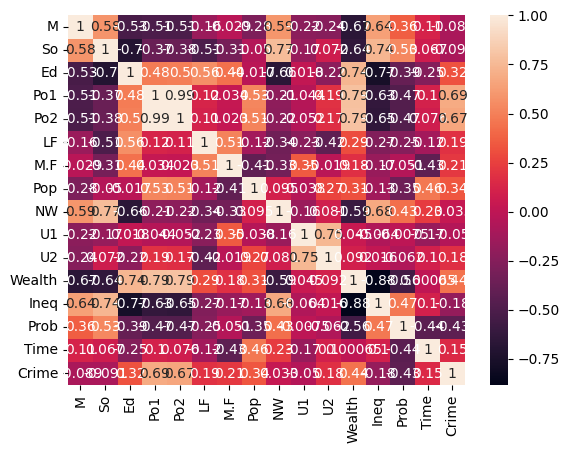

In [10]:
# prompt: display the heatmap of the df

import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)
plt.show()


#4 Building training and testing dataset

In [11]:
X = df.drop(columns=['Crime'])
Y = df['Crime']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [16]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#5 Design and implement the model

In [17]:
# prompt: train the model using linear regression

model = LinearRegression()
model.fit(X_train_pca, Y_train)


LinearRegression()

#6 testing and evaluation

In [18]:
Y_pred = model.predict(X_test_pca)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 37982.23592633162


In [21]:
# prompt: evulate the model

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)


Mean Absolute Error: 169.00687040671167
R-squared: 0.8182362356924178


In [22]:
# prompt: Display accuracy

model.score(X_test_pca, Y_test)


0.8182362356924178

In [19]:
accuracy = model.score(X_test_pca, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8182362356924178


In [23]:
# prompt: Display final results

print("Model Used: Linear Regression")
print("-------------------------------------")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Accuracy:", accuracy)


Model Used: Linear Regression
-------------------------------------
Mean Squared Error: 37982.23592633162
Mean Absolute Error: 169.00687040671167
R-squared: 0.8182362356924178
Accuracy: 0.8182362356924178


In [20]:
print("\nFinal Results:")
for true, pred in zip(Y_test[:10], Y_pred[:10]):  # Display only first 10 predictions for illustration
    print("True Crime Rate:", true, "\tPredicted Crime Rate:", pred)


Final Results:
True Crime Rate: 1216 	Predicted Crime Rate: 1028.2988747117756
True Crime Rate: 1151 	Predicted Crime Rate: 1131.6527091397847
True Crime Rate: 342 	Predicted Crime Rate: 597.7564824018855
True Crime Rate: 1030 	Predicted Crime Rate: 1112.5642779045934
True Crime Rate: 523 	Predicted Crime Rate: 536.2086897097847
True Crime Rate: 831 	Predicted Crime Rate: 1149.1148935566198
True Crime Rate: 511 	Predicted Crime Rate: 684.7219564358104
True Crime Rate: 1225 	Predicted Crime Rate: 1061.9100985751897
True Crime Rate: 1234 	Predicted Crime Rate: 983.8386145202508
True Crime Rate: 1993 	Predicted Crime Rate: 1766.5972989945762
